In [6]:
import requests
requests.get("https://huggingface.co").status_code


200

In [7]:
from datasets import load_dataset
import pandas as pd

print("Starting download...")

dataset = load_dataset("sujan-maharjan/enron_email_dataset")

print("Dataset downloaded!")

df = dataset["train"].to_pandas()

print("Converted to pandas!")
df.head()


Starting download...
Dataset downloaded!
Converted to pandas!


,Message_ID,Date,From,To,Cc,Bcc,Subject,Message
0,<11736793.1075853982199.JavaMail.evans@thyme>,"Fri, 22 Sep 2000 08:14:00 -0700 (PDT)",mkhenderson@duke-energy.com,"dfbane@duke-energy.com, jabretz@duke-energy.co...",NaN,NaN,Revised Again: Revised: Eastrans Nomination ch...,Effective 9/23/00 and continue until further n...
1,<21335734.1075863432077.JavaMail.evans@thyme>,"Mon, 23 Jul 2001 12:28:33 -0700 (PDT)",j.kaminski@enron.com,pilar.ramirez@enron.com,shirley.crenshaw@enron.com,shirley.crenshaw@enron.com,RE: Zone EF Meeting,"Pilar,\n\nI will attend.\n\n\nVince Kaminski\n\n"
2,<6394464.1075852096576.JavaMail.evans@thyme>,"Wed, 17 Oct 2001 10:51:20 -0700 (PDT)",benjamin.rogers@enron.com,joe.quenet@enron.com,NaN,NaN,FW:,\n\n
3,<14263320.1075842132531.JavaMail.evans@thyme>,"Wed, 19 Jul 2000 06:09:00 -0700 (PDT)",carol.clair@enron.com,"mark.taylor@enron.com, sara.shackleton@enron.com",NaN,NaN,Status Memo,Here is my updated status memo.\n\n\n\nCarol S...
4,<21007753.1075857397153.JavaMail.evans@thyme>,"Tue, 16 Jan 2001 10:05:00 -0800 (PST)",errol.mclaughlin@enron.com,jeffrey.gossett@enron.com,NaN,NaN,Re: Counterparties w/ Master Agreements with ECC,Yes this is correct. This is the reason Sherr...


In [8]:
df.shape

(362180, 8)

In [9]:
df.to_csv("enron_dataset_full.csv", index=False)


In [10]:
import os

print(os.getcwd())  # shows where it saved
print(os.path.getsize("enron_dataset_full.csv") / (1024 * 1024), "MB")


C:\Users\Anushree\Downloads\enron_kg_project
548.9899263381958 MB


In [11]:
df.to_csv("enron_dataset_full.zip", index=False, compression="zip")


In [12]:
df.info()
df.isnull().sum()


<class 'pandas.DataFrame'>
RangeIndex: 362180 entries, 0 to 362179
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype
---  ------      --------------   -----
 0   Message_ID  362180 non-null  str  
 1   Date        362180 non-null  str  
 2   From        362180 non-null  str  
 3   To          346837 non-null  str  
 4   Cc          89451 non-null   str  
 5   Bcc         89451 non-null   str  
 6   Subject     362180 non-null  str  
 7   Message     362180 non-null  str  
dtypes: str(8)
memory usage: 565.5 MB


Message_ID         0
Date               0
From               0
To             15343
Cc            272729
Bcc           272729
Subject            0
Message            0
dtype: int64

In [16]:
df['Date'] = df['Date'].str.replace(r"\(.*\)", "", regex=True)


AttributeError: Can only use .str accessor with string values, not datetime64

In [17]:
df['Date'].dtype


datetime64[us, UTC]

In [18]:
df['Date'].isnull().sum()


np.int64(0)

In [19]:
df.duplicated().sum()


np.int64(0)

In [20]:
df.shape


(362180, 8)

In [21]:
df['To'] = df['To'].fillna('')
df['Cc'] = df['Cc'].fillna('')
df['Bcc'] = df['Bcc'].fillna('')


In [22]:
df.isnull().sum()


Message_ID    0
Date          0
From          0
To            0
Cc            0
Bcc           0
Subject       0
Message       0
dtype: int64

In [23]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Hour'] = df['Date'].dt.hour


In [24]:
df.head()


,Message_ID,Date,From,To,Cc,Bcc,Subject,Message,Year,Month,Day,Hour
0,<11736793.1075853982199.JavaMail.evans@thyme>,2000-09-22 15:14:00+00:00,mkhenderson@duke-energy.com,"dfbane@duke-energy.com, jabretz@duke-energy.co...",,,Revised Again: Revised: Eastrans Nomination ch...,Effective 9/23/00 and continue until further n...,2000,9,22,15
1,<21335734.1075863432077.JavaMail.evans@thyme>,2001-07-23 19:28:33+00:00,j.kaminski@enron.com,pilar.ramirez@enron.com,shirley.crenshaw@enron.com,shirley.crenshaw@enron.com,RE: Zone EF Meeting,"Pilar,\n\nI will attend.\n\n\nVince Kaminski\n\n",2001,7,23,19
2,<6394464.1075852096576.JavaMail.evans@thyme>,2001-10-17 17:51:20+00:00,benjamin.rogers@enron.com,joe.quenet@enron.com,,,FW:,\n\n,2001,10,17,17
3,<14263320.1075842132531.JavaMail.evans@thyme>,2000-07-19 13:09:00+00:00,carol.clair@enron.com,"mark.taylor@enron.com, sara.shackleton@enron.com",,,Status Memo,Here is my updated status memo.\n\n\n\nCarol S...,2000,7,19,13
4,<21007753.1075857397153.JavaMail.evans@thyme>,2001-01-16 18:05:00+00:00,errol.mclaughlin@enron.com,jeffrey.gossett@enron.com,,,Re: Counterparties w/ Master Agreements with ECC,Yes this is correct. This is the reason Sherr...,2001,1,16,18


In [25]:
df['From'] = df['From'].str.lower().str.strip()


In [26]:
df['From'].head()

0    mkhenderson@duke-energy.com
1           j.kaminski@enron.com
2      benjamin.rogers@enron.com
3          carol.clair@enron.com
4     errol.mclaughlin@enron.com
Name: From, dtype: str

In [27]:
df['To'] = df['To'].str.lower().str.strip()
df['Cc'] = df['Cc'].str.lower().str.strip()
df['Bcc'] = df['Bcc'].str.lower().str.strip()


In [28]:
df[['To', 'Cc', 'Bcc']].head()


,To,Cc,Bcc
0,"dfbane@duke-energy.com, jabretz@duke-energy.co...",,
1,pilar.ramirez@enron.com,shirley.crenshaw@enron.com,shirley.crenshaw@enron.com
2,joe.quenet@enron.com,,
3,"mark.taylor@enron.com, sara.shackleton@enron.com",,
4,jeffrey.gossett@enron.com,,


In [29]:
df['To'] = df['To'].apply(lambda x: [email.strip() for email in x.split(',')] if x else [])
df['Cc'] = df['Cc'].apply(lambda x: [email.strip() for email in x.split(',')] if x else [])
df['Bcc'] = df['Bcc'].apply(lambda x: [email.strip() for email in x.split(',')] if x else [])


In [30]:
df[['To','Cc','Bcc']].head()


,To,Cc,Bcc
0,"[dfbane@duke-energy.com, jabretz@duke-energy.c...",[],[]
1,[pilar.ramirez@enron.com],[shirley.crenshaw@enron.com],[shirley.crenshaw@enron.com]
2,[joe.quenet@enron.com],[],[]
3,"[mark.taylor@enron.com, sara.shackleton@enron....",[],[]
4,[jeffrey.gossett@enron.com],[],[]


In [31]:
df_exploded = df.explode('To')


In [32]:
df_exploded[['From','To']].head(10)


,From,To
0,mkhenderson@duke-energy.com,dfbane@duke-energy.com
0,mkhenderson@duke-energy.com,jabretz@duke-energy.com
0,mkhenderson@duke-energy.com,cwcass@duke-energy.com
0,mkhenderson@duke-energy.com,mrcherry@duke-energy.com
0,mkhenderson@duke-energy.com,wespeckels@duke-energy.com
0,mkhenderson@duke-energy.com,dcspencer@duke-energy.com
0,mkhenderson@duke-energy.com,jaurbanek@duke-energy.com
0,mkhenderson@duke-energy.com,briley@enron.com
0,mkhenderson@duke-energy.com,dfarmer@enron.com
0,mkhenderson@duke-energy.com,carlos.j.rodriguez@enron.com


In [33]:
df_exploded.shape


(2189693, 12)

In [34]:
edges = df_exploded[['From', 'To', 'Date', 'Year', 'Month', 'Hour']]


In [35]:
edges.head()
edges.shape


(2189693, 6)

In [36]:
comm_freq = edges.groupby(['From', 'To']).size().reset_index(name='Email_Count')


In [37]:
comm_freq.head()
comm_freq.shape


(280853, 3)

In [38]:
sample_edges = comm_freq.sort_values(by='Email_Count', ascending=False).head(100)


In [39]:
sample_edges.head()


,From,To,Email_Count
205161,pete.davis@enron.com,pete.davis@enron.com,6414
275851,vince.kaminski@enron.com,vkaminski@aol.com,3056
111661,jeff.dasovich@enron.com,richard.shapiro@enron.com,2042
111611,jeff.dasovich@enron.com,paul.kaufman@enron.com,1958
111312,jeff.dasovich@enron.com,james.steffes@enron.com,1924


In [40]:
comm_freq = comm_freq[comm_freq['From'] != comm_freq['To']]


In [41]:
sample_edges = comm_freq.sort_values(by='Email_Count', ascending=False).head(100)
sample_edges.head()


,From,To,Email_Count
275851,vince.kaminski@enron.com,vkaminski@aol.com,3056
111661,jeff.dasovich@enron.com,richard.shapiro@enron.com,2042
111611,jeff.dasovich@enron.com,paul.kaufman@enron.com,1958
111312,jeff.dasovich@enron.com,james.steffes@enron.com,1924
111787,jeff.dasovich@enron.com,susan.mara@enron.com,1921


In [42]:
sample_edges.to_csv("sample_edges.csv", index=False)


In [ ]:
#an API that exposes structured communication insights-- FLASK API MAKING REMAININGG

In [44]:
# Collect unique persons from From and To
persons = pd.concat([df_exploded['From'], df_exploded['To']]).unique()

person_nodes = pd.DataFrame(persons, columns=['email'])

person_nodes.head()



,email
0,mkhenderson@duke-energy.com
1,j.kaminski@enron.com
2,benjamin.rogers@enron.com
3,carol.clair@enron.com
4,errol.mclaughlin@enron.com


In [45]:
email_nodes = df[['Message_ID', 'Subject', 'Date', 'Year', 'Month', 'Hour']].drop_duplicates()

email_nodes.head()


,Message_ID,Subject,Date,Year,Month,Hour
0,<11736793.1075853982199.JavaMail.evans@thyme>,Revised Again: Revised: Eastrans Nomination ch...,2000-09-22 15:14:00+00:00,2000,9,15
1,<21335734.1075863432077.JavaMail.evans@thyme>,RE: Zone EF Meeting,2001-07-23 19:28:33+00:00,2001,7,19
2,<6394464.1075852096576.JavaMail.evans@thyme>,FW:,2001-10-17 17:51:20+00:00,2001,10,17
3,<14263320.1075842132531.JavaMail.evans@thyme>,Status Memo,2000-07-19 13:09:00+00:00,2000,7,13
4,<21007753.1075857397153.JavaMail.evans@thyme>,Re: Counterparties w/ Master Agreements with ECC,2001-01-16 18:05:00+00:00,2001,1,18


In [46]:
sent_rel = df[['From', 'Message_ID']].drop_duplicates()

sent_rel.head()


,From,Message_ID
0,mkhenderson@duke-energy.com,<11736793.1075853982199.JavaMail.evans@thyme>
1,j.kaminski@enron.com,<21335734.1075863432077.JavaMail.evans@thyme>
2,benjamin.rogers@enron.com,<6394464.1075852096576.JavaMail.evans@thyme>
3,carol.clair@enron.com,<14263320.1075842132531.JavaMail.evans@thyme>
4,errol.mclaughlin@enron.com,<21007753.1075857397153.JavaMail.evans@thyme>


In [47]:
sent_to_rel = df_exploded[['Message_ID', 'To']].drop_duplicates()

sent_to_rel.head()


,Message_ID,To
0,<11736793.1075853982199.JavaMail.evans@thyme>,dfbane@duke-energy.com
0,<11736793.1075853982199.JavaMail.evans@thyme>,jabretz@duke-energy.com
0,<11736793.1075853982199.JavaMail.evans@thyme>,cwcass@duke-energy.com
0,<11736793.1075853982199.JavaMail.evans@thyme>,mrcherry@duke-energy.com
0,<11736793.1075853982199.JavaMail.evans@thyme>,wespeckels@duke-energy.com


In [48]:
person_nodes['cypher'] = person_nodes['email'].apply(
    lambda x: f'CREATE (:Person {{email: "{x}"}});'
)

person_nodes['cypher'].head()


0    CREATE (:Person {email: "mkhenderson@duke-ener...
1    CREATE (:Person {email: "j.kaminski@enron.com"});
2    CREATE (:Person {email: "benjamin.rogers@enron...
3    CREATE (:Person {email: "carol.clair@enron.com...
4    CREATE (:Person {email: "errol.mclaughlin@enro...
Name: cypher, dtype: str

In [49]:
email_nodes['cypher'] = email_nodes.apply(
    lambda row: f'CREATE (:Email {{message_id: "{row["Message_ID"]}", '
                f'subject: "{str(row["Subject"]).replace("\"","")}", '
                f'date: "{row["Date"]}", '
                f'year: {row["Year"]}, '
                f'month: {row["Month"]}, '
                f'hour: {row["Hour"]}}});',
    axis=1
)

email_nodes['cypher'].head()


0    CREATE (:Email {message_id: "<11736793.1075853...
1    CREATE (:Email {message_id: "<21335734.1075863...
2    CREATE (:Email {message_id: "<6394464.10758520...
3    CREATE (:Email {message_id: "<14263320.1075842...
4    CREATE (:Email {message_id: "<21007753.1075857...
Name: cypher, dtype: str

In [50]:
sent_rel['cypher'] = sent_rel.apply(
    lambda row: f'''
MATCH (p:Person {{email: "{row["From"]}"}})
MATCH (e:Email {{message_id: "{row["Message_ID"]}"}})
CREATE (p)-[:SENT]->(e);
''',
    axis=1
)

sent_rel['cypher'].head()


0    \nMATCH (p:Person {email: "mkhenderson@duke-en...
1    \nMATCH (p:Person {email: "j.kaminski@enron.co...
2    \nMATCH (p:Person {email: "benjamin.rogers@enr...
3    \nMATCH (p:Person {email: "carol.clair@enron.c...
4    \nMATCH (p:Person {email: "errol.mclaughlin@en...
Name: cypher, dtype: str

In [ ]:
sent_to_rel['cypher'] = sent_to_rel.apply(
    lambda row: f'''
MATCH (e:Email {{message_id: "{row["Message_ID"]}"}})
MATCH (p:Person {{email: "{row["To"]}"}})
CREATE (e)-[:SENT_TO]->(p);
''',
    axis=1
)

sent_to_rel['cypher'].head()


In [53]:
sent_to_sample = sent_to_rel.head(5000)


In [54]:
sent_to_sample['cypher'] = (
    'MATCH (e:Email {message_id: "' + sent_to_sample['Message_ID'] +
    '"}) MATCH (p:Person {email: "' + sent_to_sample['To'] +
    '"}) CREATE (e)-[:SENT_TO]->(p);'
)


In [55]:
sent_to_sample[['Message_ID', 'To', 'cypher']].head()


,Message_ID,To,cypher
0,<11736793.1075853982199.JavaMail.evans@thyme>,dfbane@duke-energy.com,"MATCH (e:Email {message_id: ""<11736793.1075853..."
0,<11736793.1075853982199.JavaMail.evans@thyme>,jabretz@duke-energy.com,"MATCH (e:Email {message_id: ""<11736793.1075853..."
0,<11736793.1075853982199.JavaMail.evans@thyme>,cwcass@duke-energy.com,"MATCH (e:Email {message_id: ""<11736793.1075853..."
0,<11736793.1075853982199.JavaMail.evans@thyme>,mrcherry@duke-energy.com,"MATCH (e:Email {message_id: ""<11736793.1075853..."
0,<11736793.1075853982199.JavaMail.evans@thyme>,wespeckels@duke-energy.com,"MATCH (e:Email {message_id: ""<11736793.1075853..."


In [56]:
person_nodes['domain'] = person_nodes['email'].str.split('@').str[1]

org_nodes = person_nodes[['domain']].drop_duplicates().rename(columns={'domain': 'name'})

org_nodes.head()


,name
0,duke-energy.com
1,enron.com
27,scientech.com
29,enron.com>
31,aol.com


In [57]:
org_nodes['cypher'] = org_nodes['name'].apply(
    lambda x: f'CREATE (:Organization {{name: "{x}"}});'
)

org_nodes.head()


,name,cypher
0,duke-energy.com,"CREATE (:Organization {name: ""duke-energy.com""});"
1,enron.com,"CREATE (:Organization {name: ""enron.com""});"
27,scientech.com,"CREATE (:Organization {name: ""scientech.com""});"
29,enron.com>,"CREATE (:Organization {name: ""enron.com>""});"
31,aol.com,"CREATE (:Organization {name: ""aol.com""});"


In [58]:
works_at_rel = person_nodes[['email', 'domain']]

works_at_rel['cypher'] = (
    'MATCH (p:Person {email: "' + works_at_rel['email'] +
    '"}) MATCH (o:Organization {name: "' + works_at_rel['domain'] +
    '"}) CREATE (p)-[:WORKS_AT]->(o);'
)

works_at_rel.head()


,email,domain,cypher
0,mkhenderson@duke-energy.com,duke-energy.com,"MATCH (p:Person {email: ""mkhenderson@duke-ener..."
1,j.kaminski@enron.com,enron.com,"MATCH (p:Person {email: ""j.kaminski@enron.com""..."
2,benjamin.rogers@enron.com,enron.com,"MATCH (p:Person {email: ""benjamin.rogers@enron..."
3,carol.clair@enron.com,enron.com,"MATCH (p:Person {email: ""carol.clair@enron.com..."
4,errol.mclaughlin@enron.com,enron.com,"MATCH (p:Person {email: ""errol.mclaughlin@enro..."


In [59]:
all_cypher = pd.concat([
    person_nodes['cypher'],
    org_nodes['cypher'],
    email_nodes.head(5000)['cypher'],   # sample for speed
    sent_rel.head(5000)['cypher'],
    sent_to_sample['cypher'],
    works_at_rel.head(5000)['cypher']
])

all_cypher.to_csv("enron_kg_script.cypher", index=False, header=False)


In [60]:
!pip install networkx matplotlib


  Using cached contourpy-1.3.3-cp312-cp312-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.9-cp312-cp312-win_amd64.whl.metadata (6.4 kB)
   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   ---------- ----------------------------- 0.5/2.1 MB 5.6 MB/s eta 0:00:01
   --------------- ------------------------ 0.8/2.1 MB 2.6 MB/s eta 0:00:01
   -------------------- ------------------- 1.0/2.1 MB 2.5 MB/s eta 0:00:01
   ----------------------------------- ---- 1.8/2.1 MB 2.2 MB/s eta 0:00:01
   ---------------------------------------- 2.1/2.1 MB 1.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.1 MB 8.2 MB/s eta 0:00:01
   ----- ---------------------------------- 1.0/8.1 MB 2.4 MB/s eta 0:00:03
   ------- -------------------------------- 1.6/8.1 MB 2.5 MB/s eta 0:00:03
   --------- --------------------------


[notice] A new release of pip is available: 25.0.1 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


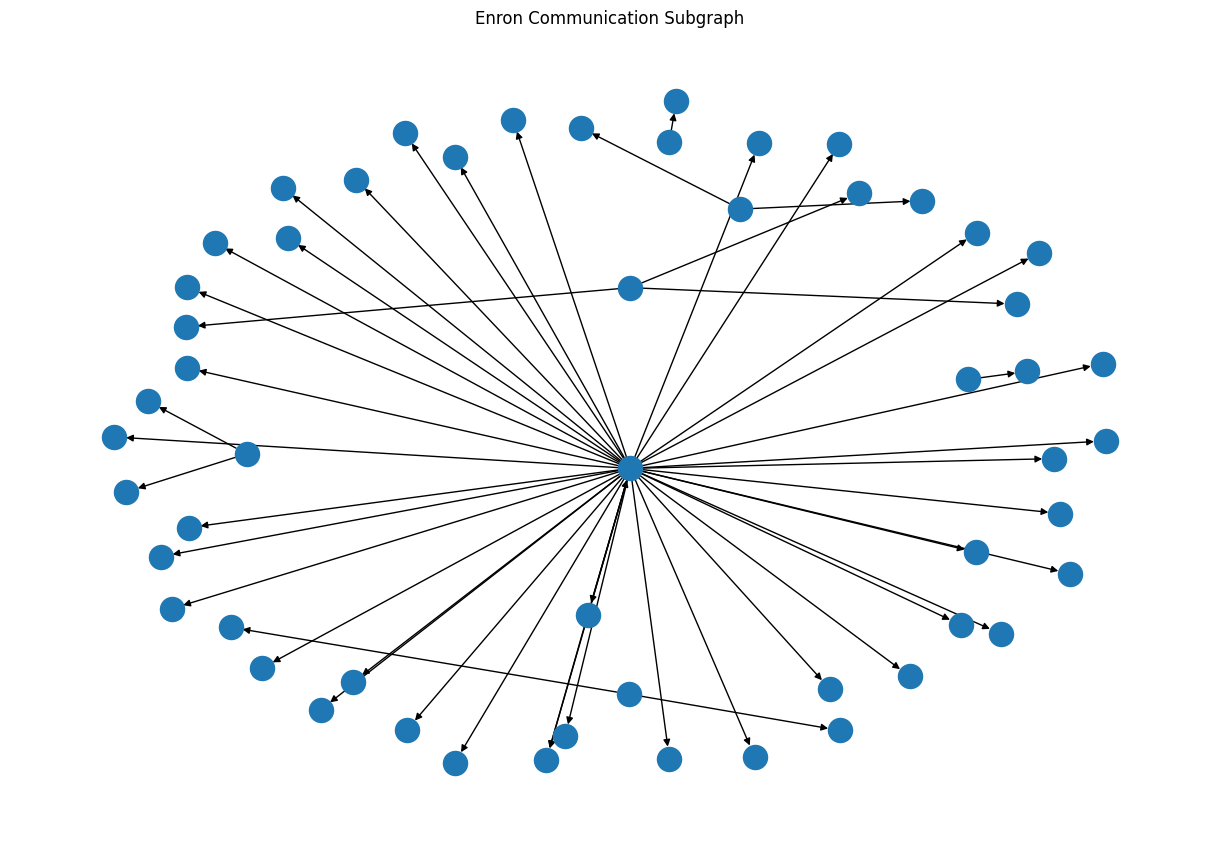

In [61]:
import networkx as nx
import matplotlib.pyplot as plt

# Create directed graph
G = nx.DiGraph()

# Add edges from sample_edges
for _, row in sample_edges.head(50).iterrows():
    G.add_edge(row['From'], row['To'], weight=row['Email_Count'])

# Draw graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=0.5)

nx.draw(G, pos, with_labels=False, node_size=300, arrows=True)
plt.title("Enron Communication Subgraph")
plt.show()


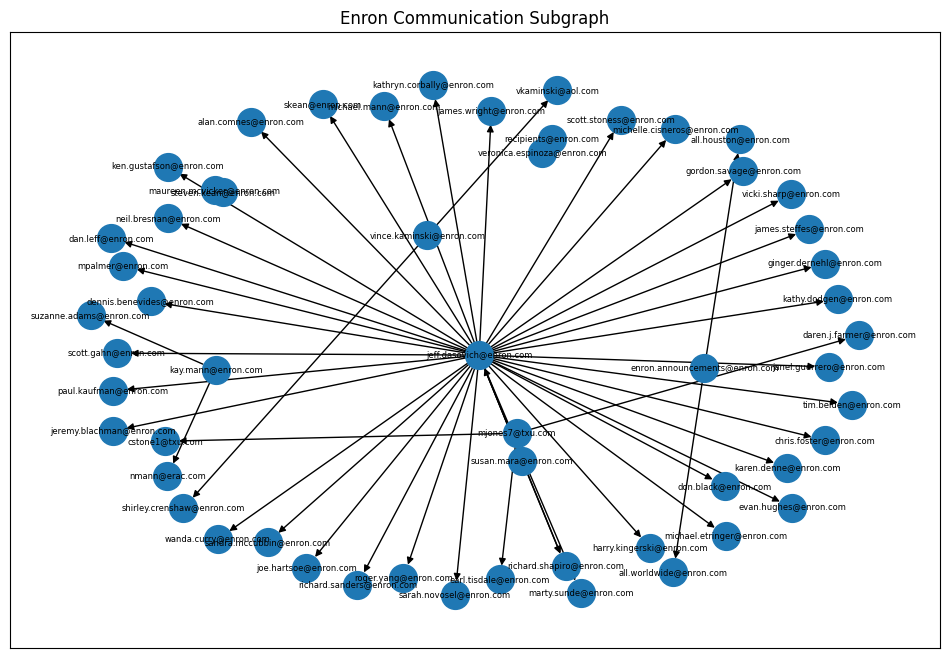

In [62]:
import networkx as nx
import matplotlib.pyplot as plt

# Create directed graph
G = nx.DiGraph()

# Add edges from sample_edges
for _, row in sample_edges.head(50).iterrows():
    G.add_edge(row['From'], row['To'], weight=row['Email_Count'])

# Draw graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=0.5)

nx.draw_networkx(G, pos, node_size=400, font_size=6)
plt.title("Enron Communication Subgraph")
plt.show()


In [63]:
degree_centrality = nx.degree_centrality(G)

top_senders = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10]

for email, score in top_senders:
    print(email, round(score, 4))


jeff.dasovich@enron.com 0.7037
susan.mara@enron.com 0.0556
mjones7@txu.com 0.0556
vince.kaminski@enron.com 0.037
richard.shapiro@enron.com 0.037
enron.announcements@enron.com 0.037
kay.mann@enron.com 0.037
vkaminski@aol.com 0.0185
paul.kaufman@enron.com 0.0185
james.steffes@enron.com 0.0185


In [64]:
in_degree = G.in_degree()

top_receivers = sorted(in_degree, key=lambda x: x[1], reverse=True)[:10]

for email, count in top_receivers:
    print(email, count)


richard.shapiro@enron.com 2
vkaminski@aol.com 1
jeff.dasovich@enron.com 1
paul.kaufman@enron.com 1
james.steffes@enron.com 1
susan.mara@enron.com 1
karen.denne@enron.com 1
skean@enron.com 1
all.worldwide@enron.com 1
recipients@enron.com 1


In [65]:
out_degree = G.out_degree()

top_senders = sorted(out_degree, key=lambda x: x[1], reverse=True)[:10]

for email, count in top_senders:
    print(email, count)


jeff.dasovich@enron.com 37
mjones7@txu.com 3
vince.kaminski@enron.com 2
susan.mara@enron.com 2
enron.announcements@enron.com 2
kay.mann@enron.com 2
veronica.espinoza@enron.com 1
steven.kean@enron.com 1
vkaminski@aol.com 0
richard.shapiro@enron.com 0


In [66]:
components = list(nx.weakly_connected_components(G))

largest_cluster = max(components, key=len)

print("Largest cluster size:", len(largest_cluster))


Largest cluster size: 38
